<a href="https://colab.research.google.com/github/0xs1d/pwskills/blob/main/Boosting_Assignment_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting Techniques — Assignment Solutions



## 1. What is Boosting in Machine Learning? Explain how it improves weak learners.
Boosting is an ensemble technique where models are trained sequentially. Each new model focuses more on the mistakes of the previous one. It improves weak learners by adjusting weights on misclassified samples, reducing bias, and combining multiple weak models into a strong model.

## 2. Difference between AdaBoost and Gradient Boosting.
- **AdaBoost:** Reweights training samples based on previous errors.
- **Gradient Boosting:** Fits new learners to residual errors using gradient descent.
AdaBoost adjusts sample importance, whereas Gradient Boosting minimizes a loss function directly.

## 3. How does regularization help in XGBoost?
XGBoost uses L1 and L2 regularization to reduce overfitting. It penalizes overly complex trees, stabilizes leaf weights, and improves generalization.

## 4. Why is CatBoost considered efficient for handling categorical data?
CatBoost uses ordered target encoding and permutation-based techniques that avoid target leakage and require no manual one-hot encoding. This makes it highly efficient for categorical features.

## 5. Real-world applications where boosting is preferred over bagging.
Boosting is preferred in fraud detection, credit scoring, medical diagnosis, ranking algorithms, churn prediction, and any domain where accuracy is critical and data may be noisy or imbalanced.

## 6. AdaBoost Classifier on Breast Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9649122807017544


## 7. Gradient Boosting Regressor on California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
print("R² Score:", r2_score(y_test, pred))

R² Score: 0.7803117736943137


## 8. XGBoost Classifier — Tune Learning Rate with GridSearchCV

In [3]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), params, cv=3)
grid.fit(X, y)

best_model = grid.best_estimator_
pred = best_model.predict(X)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y, pred))

Best Parameters: {'learning_rate': 0.05}
Accuracy: 0.9982425307557118


## 9. CatBoost Classifier — Confusion Matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


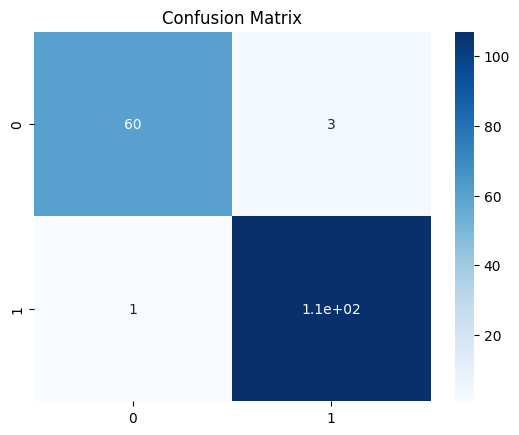

In [5]:
import sys
!{sys.executable} -m pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 10. FinTech Loan Default Prediction — End‑to‑End Pipeline Explanation


### **1. Data Preprocessing**
- Fill missing numerical values using median.
- Fill missing categorical values using CatBoost encoder.
- Standardize numerical features for AdaBoost/GradientBoosting.
- Handle imbalance using SMOTE or class weights.

### **2. Model Choice**
- **CatBoost** – best for mixed categorical + numerical data and missing values.
- **XGBoost** – powerful but needs more preprocessing.
- **AdaBoost** – simple but works best when data is clean and balanced.

### **3. Hyperparameter Tuning**
Use GridSearchCV or RandomizedSearchCV:  
- Depth  
- Learning rate  
- Number of estimators  
- L2 regularization  
- Subsampling ratios  

### **4. Evaluation Metrics**
- **ROC-AUC** → Best for imbalanced datasets  
- **Precision & Recall** → Important when false negatives are costly  
- **F1-score** → Balanced metric  
- **Confusion Matrix** → Operational insights  

### **5. Business Impact**
- Reduces loan default loss  
- Identifies risky customers early  
- Improves decision accuracy  
- Supports regulatory compliance with model explainability  
